In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import itertools as it

import numpy as np
import matplotlib.pyplot as plt

from cibinfo.powerspectra import cibxcib as TT

# Plot first power spectrum

In [11]:
freqs = ['353', '545', '857']
n_freqs = len(freqs)

ref_names = ['Planck14Data', 'Planck14Model', 'Mak17', 'Maniyar18Model']

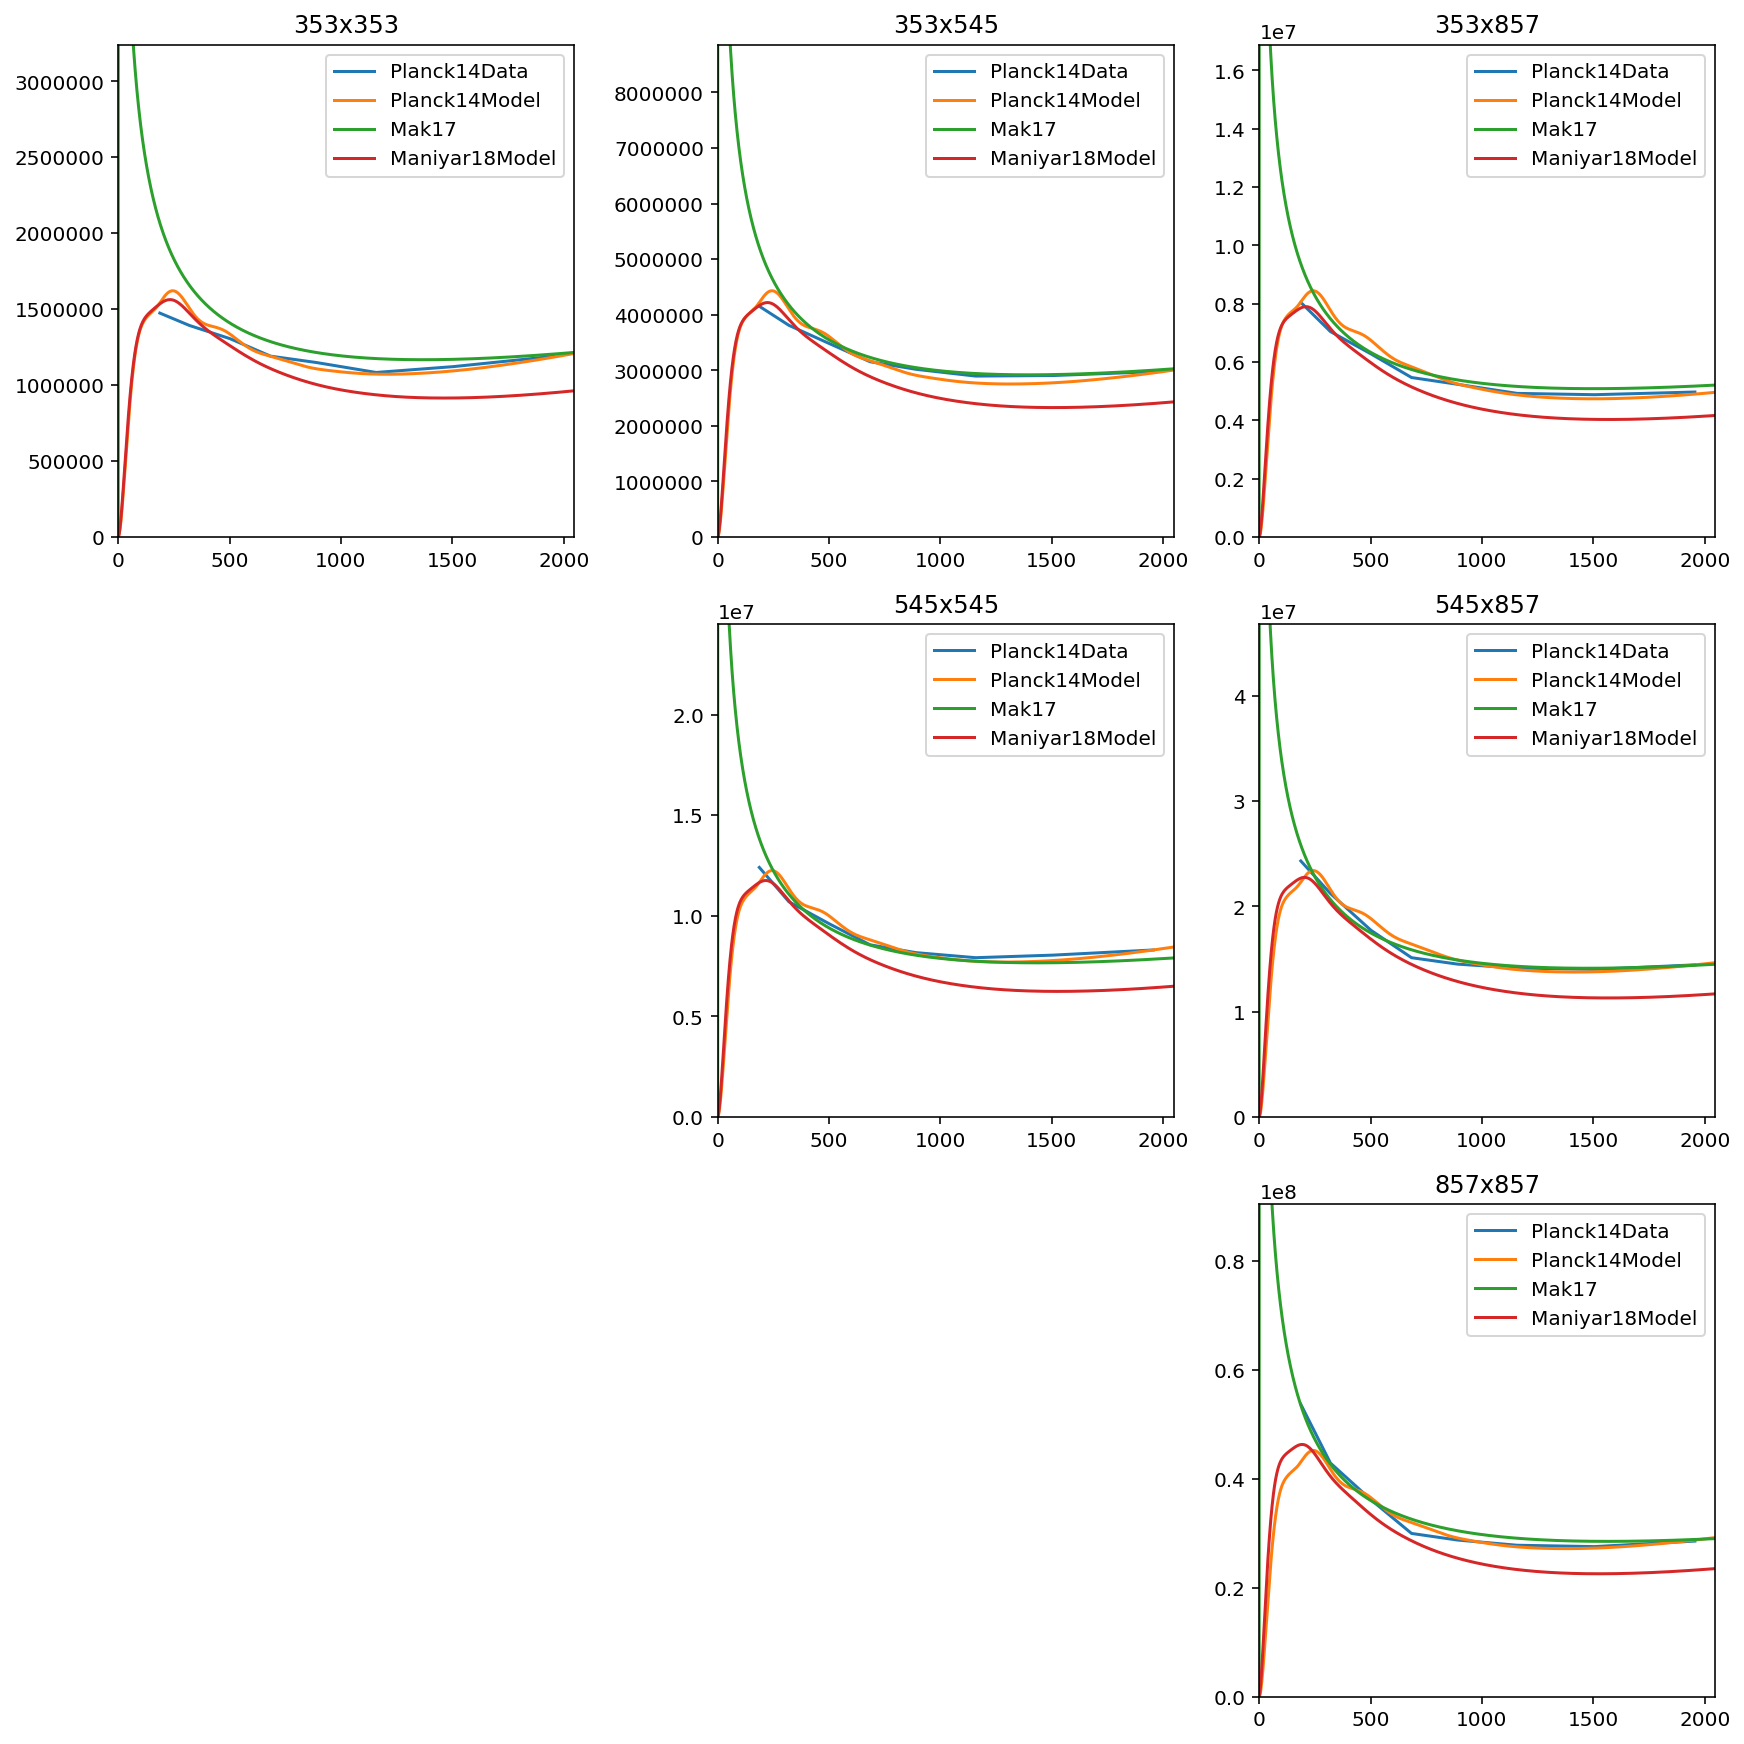

In [20]:
fig, axes = plt.subplots(ncols=n_freqs, nrows=n_freqs, figsize=(4 * n_freqs, 4*n_freqs))

for row_idx, row in enumerate(axes):
    for col_idx, col in enumerate(row):
        ax = axes[row_idx][col_idx]
        # Skip lower triangle
        if row_idx > col_idx:
            ax.axis('off')
            continue
            

        for ref_name in ref_names:
            ref = getattr(TT, ref_name)(freq1=freqs[row_idx], freq2=freqs[col_idx], unit='Jy^2/sr')
            
            # plot
            ax.plot(ref.l, ref.l*ref.Cl, label=ref_name)
            ax.legend()
            
            ax.set_title(f"{freqs[row_idx]}x{freqs[col_idx]}")
            
            # Limits
            ax.set_xlim(1, 2048)
            ref_for_ylim = getattr(TT, 'Planck14Model')(freq1=freqs[row_idx], freq2=freqs[col_idx], unit='Jy^2/sr')
            ref_for_ylim = ref_for_ylim.l*ref_for_ylim.Cl
            ax.set_ylim(0., ref_for_ylim.max()*2.)
        
        
    

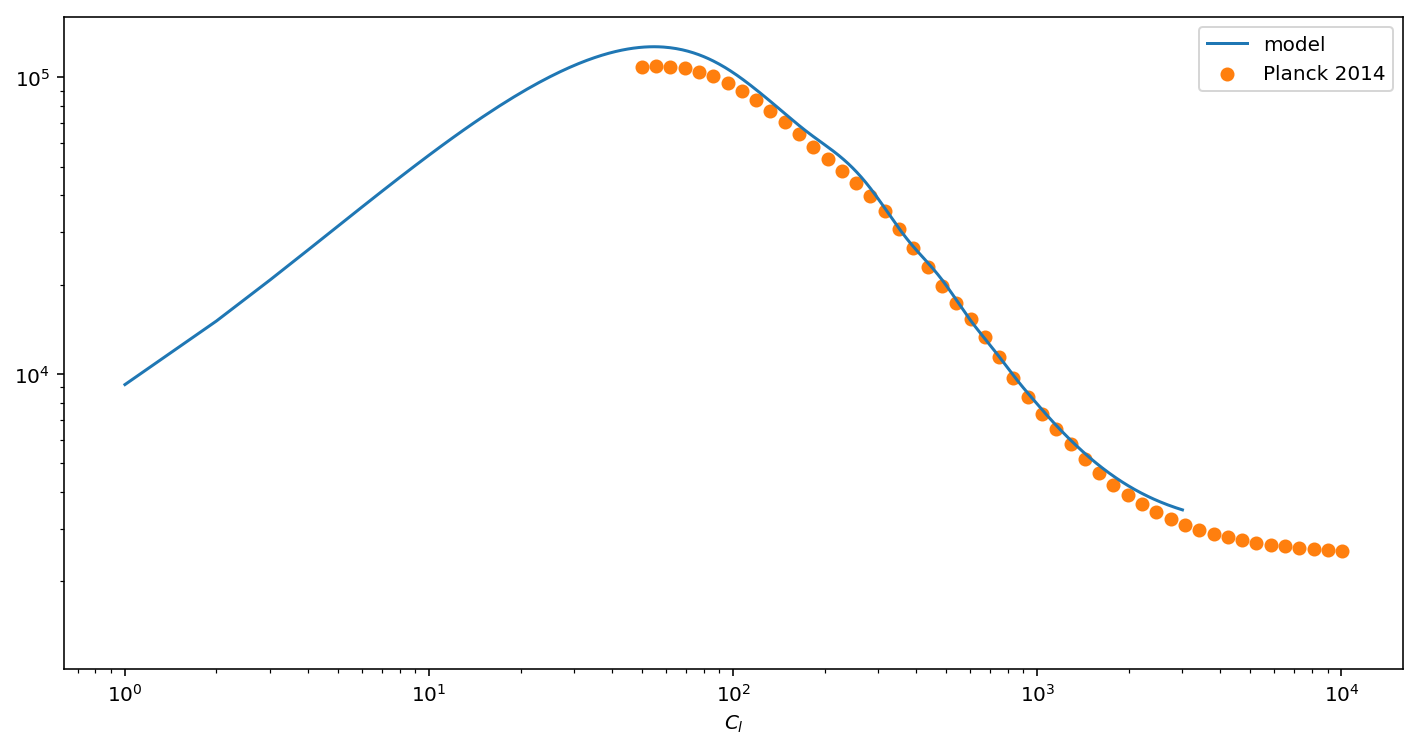

In [7]:
plt.plot(model.l, model.Cl, label='model')
plt.scatter(planck2014.l, planck2014.Cl + planck2014.S, label='Planck 2014', c='C1')

# labels & legend
plt.xlabel(r'$l$')
plt.ylabel(r'$C_l$')
plt.legend()
plt.loglog();

# Multi-frequency

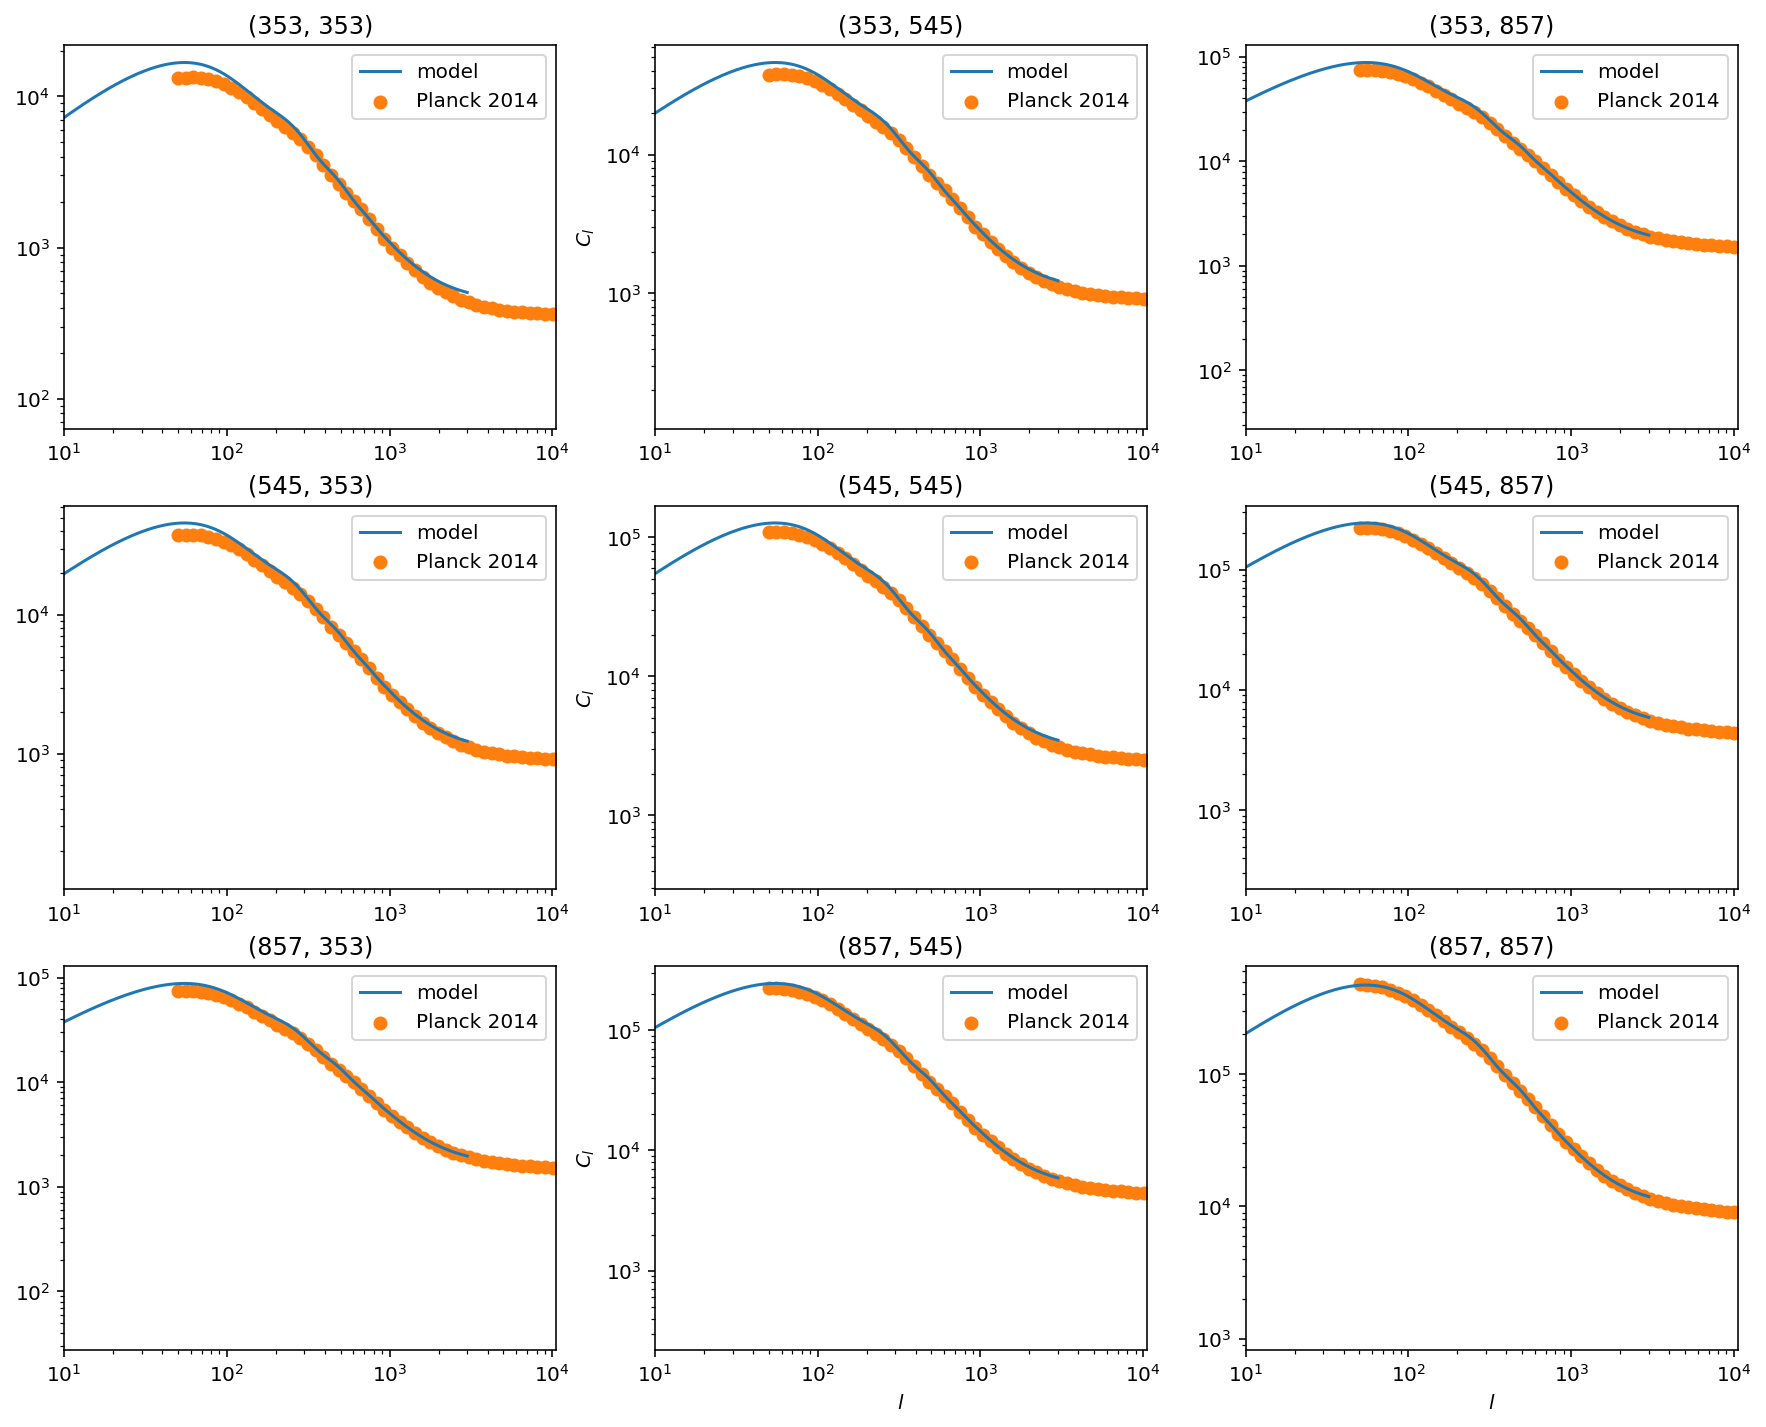

In [28]:
fig = plt.figure(figsize=(15, 12))
freqs = [353, 545, 857]

for i, freqs in enumerate(it.product(freqs, repeat=2)):
    model = PaoloModel(*freqs)
    planck2014 = Planck2014(*freqs)
    
    ax = fig.add_subplot(3,3, i+1)

    # plot
    ax.plot(model.l, model.Cl, label='model')
    ax.scatter(planck2014.l, planck2014.Cl + planck2014.S, label='Planck 2014', c='C1')

    # limits
    ax.set_xlim([10, None])
    
    # labels & legend
    ax.set_title(str(freqs))
    if i >= 7:
        ax.set_xlabel(r'$l$')
    if i in [1, 4, 7]:
        ax.set_ylabel(r'$C_l$')
    ax.legend()
    ax.loglog();